Project-2 by Tahmid Zaman Tahi

In [25]:
import numpy as np

In [26]:
#Define maze matrix
maze= np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1], 
                [1, 2, 2, 2, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1], 
                [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1], 
                [1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], 
                [1, 2, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1], 
                [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1],
                [1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1], 
                [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1], 
                [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1], 
                [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1], 
                [1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1], 
                [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], 
                [1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], 
                [1, 0, 0, 0, 4, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 2, 2, 1],
                [1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
                [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 3, 0, 0, 3, 0, 1], 
                [1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],np.int32)

#Define start and goal point
start_position = None
goal_position = None
for i in range(len(maze)):
    for j in range(len(maze[i])):
        if maze[i][j] == 4:
            start_position = (i, j)
        elif maze[i][j] == 5:
            goal_position = (i, j)

S= []
for i in range(len(maze)):
  for j in range(len(maze[i])):
    if maze [i][j] != 1:
      S.append((i,j))

In [27]:
#Define action space
A = ["U", "D", "L", "R"]

#Define transition probabilities
p = 0.02
anticipated_p = 1-p
neighbor_p = p/3

In [28]:
#Define reward function
def reward(state):
  i, j = state
  cell = maze[i][j]
  if cell == 1:  # wall
      return None
  elif cell == 2 or cell == 3:  # oil or bump
      return -5 if cell == 2 else -10
  elif cell == 5:  # goal
      return 200
  else:  # empty space
      return -1


In [29]:
#Initialize policy all left and value states zero
policy= {s: "L" for s in S}
V= {s: 0 for s in S}


Policy iteration: Base case scenario

In [30]:
gamma = 0.95
theta = 0.01

# Policy iteration
while True:
    # Policy evaluation
    while True:
        delta = 0
        for s in S:
            v = V[s]
            initial_action = policy[s]
            next_states = [(s[0]-1, s[1]), (s[0]+1, s[1]), (s[0], s[1]-1), (s[0], s[1]+1)]
            next_values = []
            for i, next_state in enumerate(next_states):
                if next_state in S:
                    anticipated_value = anticipated_p * (reward(next_state) + gamma * V[next_state])
                    neighbor_value = 0
                    for j, neighbor_state in enumerate(next_states):
                        if i != j and neighbor_state in S:
                            neighbor_value += neighbor_p * (reward(neighbor_state) + gamma * V[neighbor_state])
                    next_value = anticipated_value + neighbor_value
                    next_values.append(next_value)
                else:
                    next_values.append(-np.inf)
            V[s] = np.max(next_values)
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break

    # Policy improvement
    policy_stable = True
    for s in S:
        initial_action = policy[s]
        next_states = [(s[0]-1, s[1]), (s[0]+1, s[1]), (s[0], s[1]-1), (s[0], s[1]+1)]
        action_values = []
        for i, next_state in enumerate(next_states):
            if next_state in S:
                anticipated_value = anticipated_p * (reward(next_state) + gamma * V[next_state])
                neighbor_value = 0
                for j, neighbor_state in enumerate(next_states):
                    if i != j and neighbor_state in S:
                        neighbor_value += neighbor_p * (reward(neighbor_state) + gamma * V[neighbor_state])
                next_value = anticipated_value + neighbor_value
                action_values.append(next_value)
            else:
                action_values.append(-np.inf)
        best_action = A[np.argmax(action_values)]
        policy[s] = best_action
        if initial_action != best_action:
            policy_stable = False
    if policy_stable:
        break




In [31]:
print("Optimal Policy:")
print(policy)
print("\nOptimal State-Value Function:")
print(V)

Optimal Policy:
{(1, 1): 'R', (1, 2): 'R', (1, 3): 'R', (1, 4): 'R', (1, 5): 'R', (1, 6): 'R', (1, 7): 'D', (1, 8): 'R', (1, 9): 'D', (1, 10): 'D', (1, 11): 'D', (1, 12): 'D', (1, 13): 'D', (1, 14): 'D', (1, 15): 'D', (1, 16): 'L', (1, 17): 'D', (1, 18): 'L', (2, 1): 'R', (2, 2): 'R', (2, 3): 'U', (2, 4): 'U', (2, 6): 'R', (2, 7): 'R', (2, 8): 'R', (2, 9): 'R', (2, 10): 'R', (2, 11): 'R', (2, 12): 'R', (2, 13): 'D', (2, 14): 'L', (2, 15): 'L', (2, 16): 'L', (2, 17): 'L', (2, 18): 'L', (3, 1): 'R', (3, 2): 'U', (3, 3): 'U', (3, 4): 'U', (3, 6): 'R', (3, 7): 'R', (3, 8): 'R', (3, 9): 'R', (3, 10): 'R', (3, 11): 'R', (3, 12): 'R', (3, 13): 'U', (3, 14): 'L', (3, 15): 'L', (3, 16): 'L', (3, 17): 'L', (3, 18): 'L', (4, 1): 'U', (4, 2): 'U', (4, 17): 'U', (4, 18): 'U', (5, 1): 'U', (5, 2): 'U', (5, 4): 'R', (5, 5): 'R', (5, 6): 'R', (5, 7): 'R', (5, 8): 'R', (5, 9): 'R', (5, 10): 'R', (5, 11): 'R', (5, 12): 'R', (5, 13): 'R', (5, 14): 'R', (5, 15): 'R', (5, 16): 'R', (5, 17): 'U', (5, 18): '

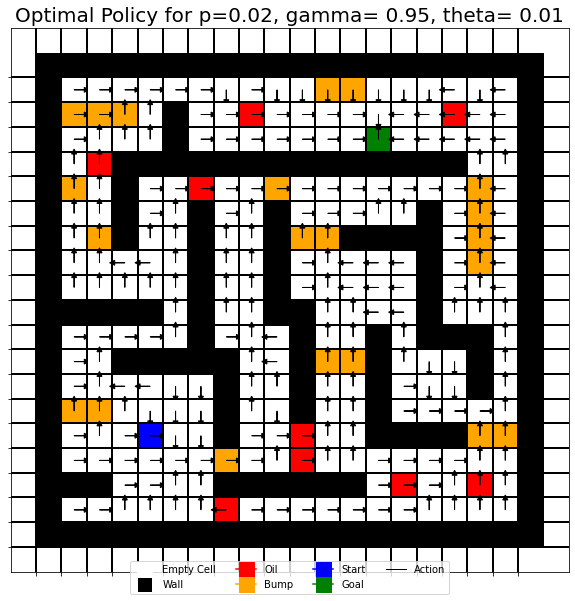

In [32]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

cmap = plt.get_cmap('tab20')
colors = {
    1: 'black',
    2: 'orange',
    3: 'red',
    4: 'blue',
    5: 'green',
    0: 'white'
}

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(maze)):
   for j in range(len(maze[i])):
        cell_type = maze[i][j]
        color = colors[cell_type]
        rect = plt.Rectangle((j, len(maze) - i - 1), 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)
        if cell_type != 1:
            action = policy[(i, j)]
            
            # Draw arrow
            dx, dy = 0, 0
            if action == "U":
                dy = 0.4
            elif action == "D":
                dy = -0.4
            elif action == "L":
                dx = -0.4
            elif action == "R":
                dx = 0.4
            ax.arrow(j+0.5, len(maze)-i-0.5, dx, dy, head_width=0.2, head_length=0.2, fc='black', ec='black')

ax.set_xticks(np.arange(0, len(maze[0]), 1))
ax.set_yticks(np.arange(0, len(maze), 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, color='black', linestyle='-', linewidth=2)

legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='Empty Cell', markerfacecolor='white', markersize=15),
    Line2D([0], [0], marker='s', color='w', label='Wall', markerfacecolor='black', markersize=15),
    Line2D([0], [0], marker='s', color='red', label='Oil', markerfacecolor='red', markersize=15),
    Line2D([0], [0], marker='s', color='orange', label='Bump', markerfacecolor='orange', markersize=15),
    Line2D([0], [0], marker='s', color='b', label='Start', markerfacecolor='blue', markersize=15),
    Line2D([0], [0], marker='s', color='g', label='Goal', markerfacecolor='green', markersize=15),
    Line2D([0], [0], color='black', lw=1, label='Action'),
]
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
ax.set_title('Optimal Policy for p=0.02, gamma= 0.95, theta= 0.01', fontsize=20)
plt.show()


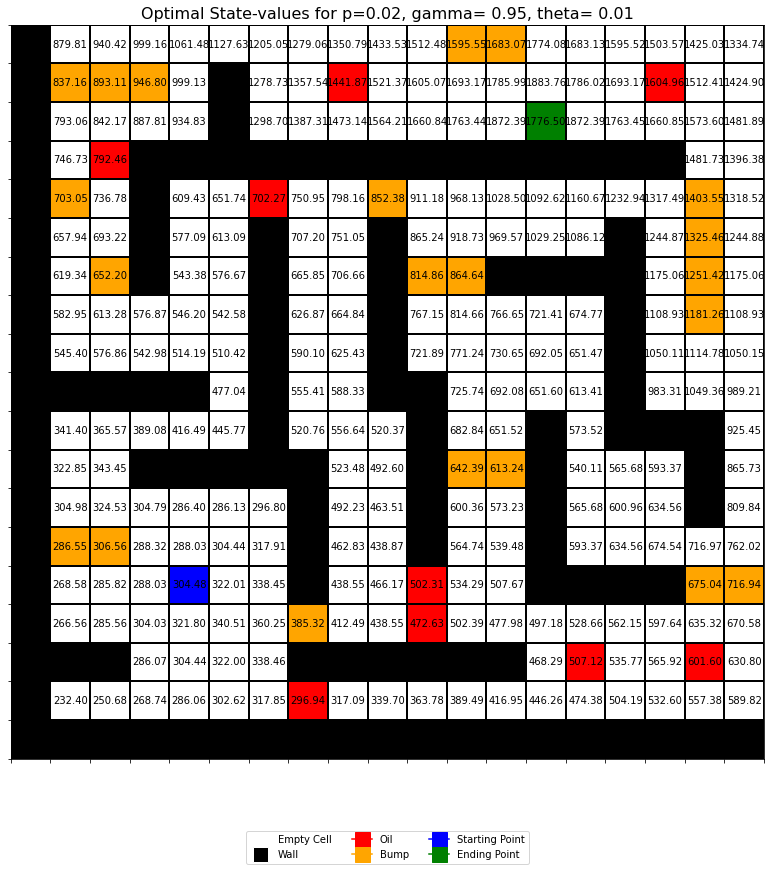

In [33]:
fig, ax = plt.subplots(figsize=(13.5, 13.5))

for i in range(len(maze)):
    for j in range(len(maze[i])):
        cell_type = maze[i][j]
        color = colors[cell_type]
        rect = plt.Rectangle((j, len(maze) - i - 1), 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)
        # Add optimal state-value to cell
        if cell_type != 1:
            value = V[(i, j)]
            ax.text(j+0.5, len(maze)-i-0.5, f'{value:.2f}', ha='center', va='center')

ax.set_xticks(np.arange(0, len(maze[0]), 1))
ax.set_yticks(np.arange(0, len(maze), 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, color='black', linestyle='-', linewidth=2)

legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='Empty Cell', markerfacecolor='white', markersize=15),
    Line2D([0], [0], marker='s', color='w', label='Wall', markerfacecolor='black', markersize=15),
    Line2D([0], [0], marker='s', color='red', label='Oil', markerfacecolor='red', markersize=15),
    Line2D([0], [0], marker='s', color='orange', label='Bump', markerfacecolor='orange', markersize=15),
    Line2D([0], [0], marker='s', color='blue', label='Starting Point', markerfacecolor='blue', markersize=15),
    Line2D([0], [0], marker='s', color='green', label='Ending Point', markerfacecolor='green', markersize=15)
]
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize='medium')

ax.set_title('Optimal State-values for p=0.02, gamma= 0.95, theta= 0.01', fontsize=16)
plt.show()

Current Position: (15, 5)
Action: R
Current Position: (16, 5)
Action: D
Current Position: (16, 6)
Action: R
Current Position: (16, 7)
Action: R
Current Position: (16, 8)
Action: R
Current Position: (16, 9)
Action: R
Current Position: (15, 9)
Action: U
Current Position: (15, 10)
Action: R
Current Position: (15, 11)
Action: R
Current Position: (14, 11)
Action: U
Current Position: (13, 11)
Action: U
Current Position: (12, 11)
Action: U
Current Position: (11, 11)
Action: U
Current Position: (10, 11)
Action: U
Current Position: (9, 11)
Action: U
Current Position: (8, 11)
Action: U
Current Position: (7, 11)
Action: U
Current Position: (6, 11)
Action: U
Current Position: (6, 12)
Action: R
Current Position: (6, 13)
Action: R
Current Position: (5, 13)
Action: U
Current Position: (5, 14)
Action: R
Current Position: (5, 15)
Action: R
Current Position: (5, 16)
Action: R
Current Position: (5, 17)
Action: R
Current Position: (4, 17)
Action: U
Current Position: (3, 17)
Action: U
Current Position: (3,

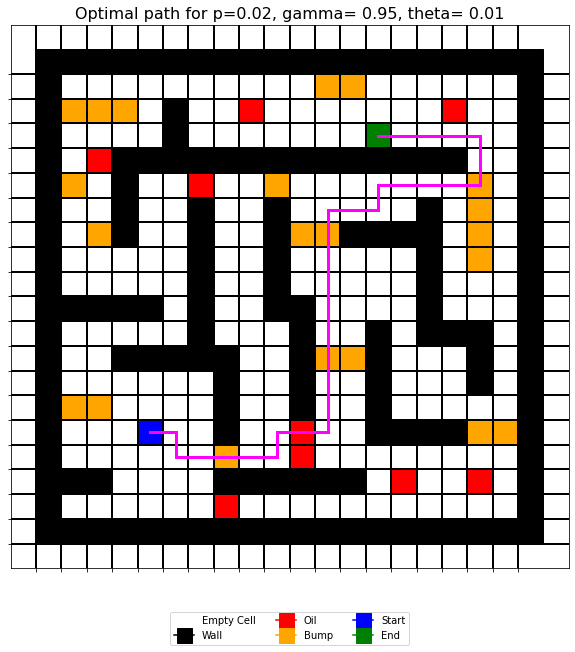

In [34]:
#Optimal path from start to end goal:
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(maze)):
   for j in range(len(maze[i])):
        cell_type = maze[i][j]
        color = colors[cell_type]
        rect = plt.Rectangle((j, len(maze) - i - 1), 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)
        if cell_type != 1:
            action = policy[(i, j)]
            
# Plot optimal path
current_position = start_position
path = []
while current_position != goal_position:
    path.append(current_position)
    action = policy[current_position]
    if action == "U":
        current_position = (current_position[0] - 1, current_position[1])
    elif action == "D":
        current_position = (current_position[0] + 1, current_position[1])
    elif action == "L":
        current_position = (current_position[0], current_position[1] - 1)
    elif action == "R":
        current_position = (current_position[0], current_position[1] + 1)
    
    # Debugging statement to print the current position and action
    print("Current Position:", current_position)
    print("Action:", action)
    
    # Add a break statement if the loop runs for too long
    if len(path) > 1000:
        print("Loop exceeded maximum length, breaking.")
        break

path.append(current_position)

# Debugging statement to print the path length
print("Path Length:", len(path))

for i in range(len(path)-1):
    start = path[i]
    end = path[i+1]
    ax.plot([start[1]+0.5, end[1]+0.5], [len(maze)-start[0]-0.5, len(maze)-end[0]-0.5], c='magenta', lw=3)


ax.set_xticks(np.arange(0, len(maze[0]), 1))
ax.set_yticks(np.arange(0, len(maze), 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, color='black', linestyle='-', linewidth=2)

legend_elements = [
    Line2D([0], [0], marker='s', color='white', label='Empty Cell', markerfacecolor='white', markersize=15),
    Line2D([0], [0], marker='s', color='black', label='Wall', markerfacecolor='black', markersize=15),
    Line2D([0], [0], marker='s', color='red', label='Oil', markerfacecolor='red', markersize=15),
    Line2D([0], [0], marker='s', color='orange', label='Bump', markerfacecolor='orange', markersize=15),
    Line2D([0], [0], marker='s', color='blue', label='Start', markerfacecolor='blue', markersize=15),
    Line2D([0], [0], marker='s', color='green', label='End', markerfacecolor='green', markersize= 15)
]

ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize='medium')

ax.set_title('Optimal path for p=0.02, gamma= 0.95, theta= 0.01', fontsize=16)
plt.show()

Observations: 

**Running the same code for p= 0.5, gamma= 0.95 and theta= 0.01**

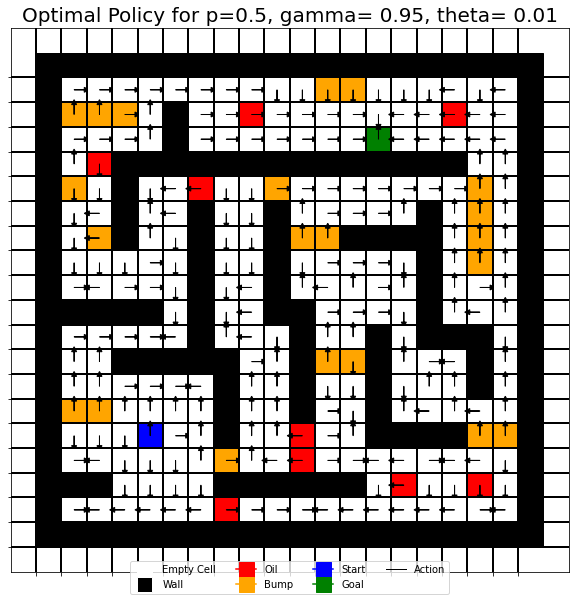

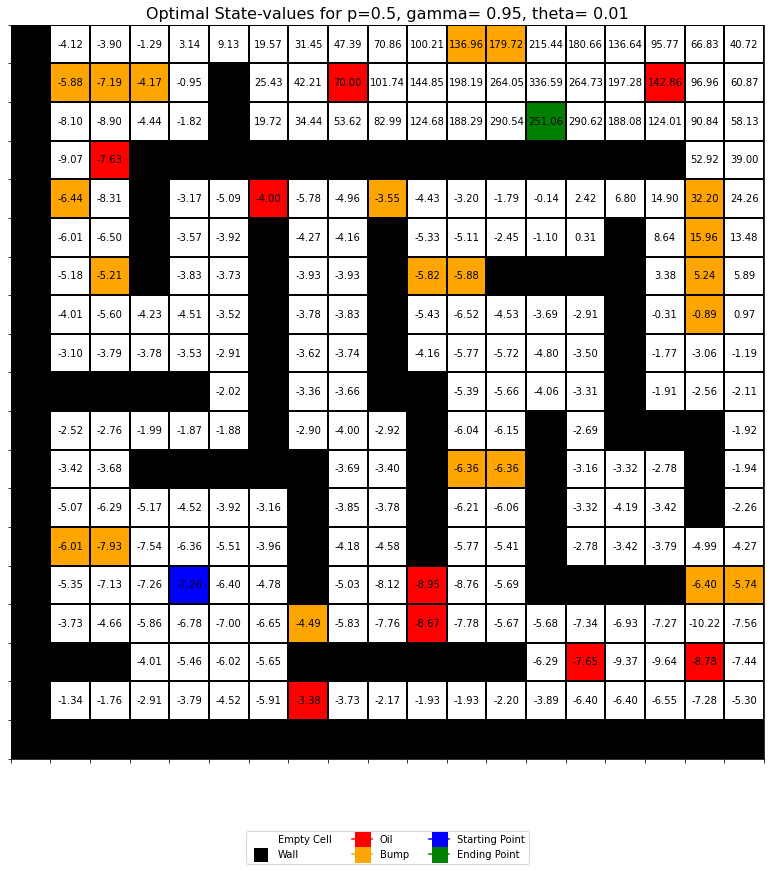

Observations: For p=0.5, the probability is large enough that the scenario is largely stochastic. That is the agent is more likely to end up in unintended cells. Thus to find optimal policy, more iterations are required to converge as the agent has to explore more. Because p is such a high value, it is very hard to calculate the optimal path, thus in my case, the code had to be broken after 1000 iterations and I couldn't generate the optimal path. 

**Running the same code for p= 0.02, gamma= 0.55 and theta= 0.01**

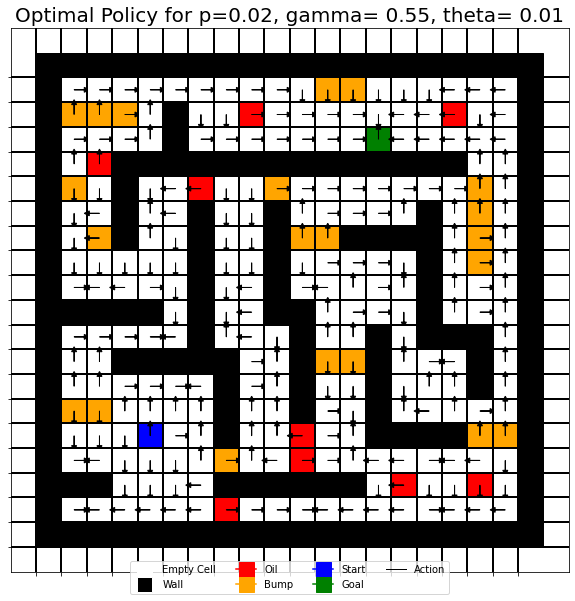

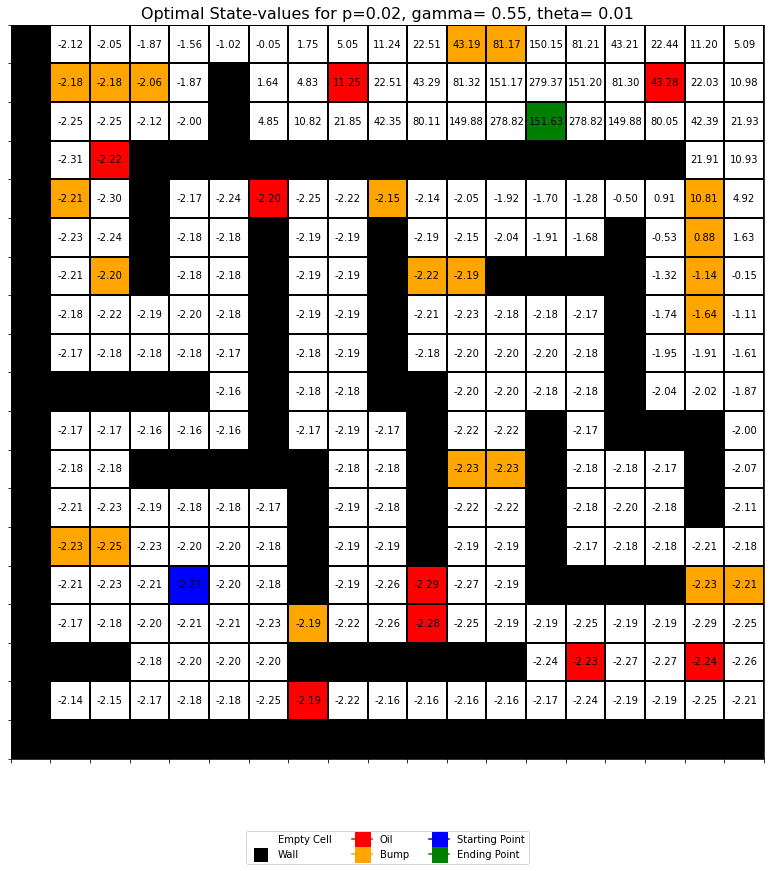

Observation: For gamma=0.55, the discount factor is low enough so that the agent looks at immediate rewards instead of future rewards. Thus less iterations are needed to converge as exploration is less. But the results obtained are suboptimal for this very reason and optimal path is not obtained. 